<a href="https://colab.research.google.com/github/KORALLLL/MTUCI_EMNIST/blob/Artem/lenet/Artem_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***MODEL FROM PREVIOUS EXPETIMENT***

<table>
  <tr>
    <th>Layer</th>
    <th>Layer type2</th>
    <th>Feature maps</th>
    <th>Size</th>
    <th>Kernel size</th>
    <th>Stride</th>
    <th>Padding</th>
    <th>Activation</th>
  </tr>
  <tr>
    <th>input</th>
    <th>image</th>
    <th>1</th>
    <th>28*28</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
  <tr>
    <th>1</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>2</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>3</th>
    <th>convolution</th>
    <th>2</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>4</th>
    <th>convolution</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>5</th>
    <th>convolution</th>
    <th>4</th>
    <th>28*28</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>6</th>
    <th>avg pooling</th>
    <th>4</th>
    <th>14*14</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>7</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>8</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>9</th>
    <th>convolution</th>
    <th>8</th>
    <th>12*12</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>10</th>
    <th>convolution</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>11</th>
    <th>convolution</th>
    <th>16</th>
    <th>10*10</th>
    <th>3*3</th>
    <th>1</th>
    <th>1</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>12</th>
    <th>max pooling</th>
    <th>16</th>
    <th>5*5</th>
    <th>2*2</th>
    <th>2</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>13</th>
    <th>fully connected</th>
    <th>-</th>
    <th>120</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>14</th>
    <th>fully connected</th>
    <th>-</th>
    <th>84</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>ReLU</th>
  </tr>
  <tr>
    <th>output</th>
    <th>fully connected</th>
    <th>-</th>
    <th>35</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
  </tr>
</table>

Train dataset: MNIST + EMNIST letters

Test dataset: dataset of DreamTeam

Training sample size: 36960

Testing sample size: 16784

Loss function: Cross Entropy Loss

Optimizer: Adam

Learning rate: 1.0e-3

Batch size: 1120

***IMPORT***

---

In [2]:
import torch
import torchvision.datasets
import random
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm_notebook as bar

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

***REPO***

---



In [3]:
!git clone https://github.com/KORALLLL/MTUCI_EMNIST.git

Cloning into 'MTUCI_EMNIST'...
remote: Enumerating objects: 36486, done.
remote: Counting objects: 100% (12846/12846), done.
remote: Compressing objects: 100% (12682/12682), done.
remote: Total 36486 (delta 183), reused 12797 (delta 157), pack-reused 23640
Receiving objects: 100% (36486/36486), 128.68 MiB | 25.71 MiB/s, done.
Resolving deltas: 100% (468/468), done.


***TORCH.DEVICE***

---



In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

***DATASET***

---



In [5]:
emnist_train = torchvision.datasets.EMNIST('./', split='letters', download = True, train = True)
mnist_train = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = True)
emnist_val = torchvision.datasets.EMNIST('./', split='letters', download = True, train = False)
mnist_val = torchvision.datasets.EMNIST('./', split='mnist', download = True, train = False)

emnist_train_data = emnist_train.data
mnist_train_data = mnist_train.data
train_data = torch.cat([emnist_train_data[:24960], mnist_train_data[:12000]], dim=0).float().unsqueeze(1).to(device) / 255

emnist_val_data = emnist_val.data
mnist_val_data = mnist_val.data
val_data = torch.cat([emnist_val_data, mnist_val_data], dim=0).float().unsqueeze(1).to(device) / 255

temp_emnist_train_labels = emnist_train.targets[:24960]
emnist_train_labels = []

temp_emnist_val_labels = emnist_val.targets
emnist_val_labels = []

for i in range(len(temp_emnist_train_labels)):
  if temp_emnist_train_labels[i]==15:
    emnist_train_labels.append(torch.tensor(0))
  elif temp_emnist_train_labels[i]>15:
    emnist_train_labels.append(temp_emnist_train_labels[i]+8)
  else:
    emnist_train_labels.append(temp_emnist_train_labels[i]+9)

for i in range(len(temp_emnist_val_labels)):
  if temp_emnist_val_labels[i]==15:
    emnist_val_labels.append(torch.tensor(0))
  elif temp_emnist_val_labels[i]>15:
    emnist_val_labels.append(temp_emnist_val_labels[i] + 8)
  else:
    emnist_val_labels.append(temp_emnist_val_labels[i]+9)

mnist_train_labels = mnist_train.targets
train_labels = torch.cat([torch.stack(emnist_train_labels[:24960]), mnist_train_labels[:12000]], dim=0).to(device)

mnist_val_labels = mnist_val.targets
val_labels = torch.cat([torch.stack(emnist_val_labels), mnist_val_labels], dim=0).to(device)


file = open('MTUCI_EMNIST/dataset.pkl', 'rb')
test_dataset = pickle.load(file)
file.close()

test_data = test_dataset['data'].numpy()
test_data = np.flip(test_data, axis = 3)
test_data = np.rot90(test_data, k=1, axes=(2,3))
test_data = 1 - test_data
test_data = torch.from_numpy(test_data).float().to(device)
test_labels = test_dataset['targets'].to(device)

100%|██████████| 561753746/561753746 [00:05<00:00, 108398611.39it/s]


Extracting ./EMNIST/raw/gzip.zip to ./EMNIST/raw


***NEURAL NETS***

In [ ]:
class LeNet1(torch.nn.Module):
  def __init__(self):
    super(LeNet1, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.act1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.act2 = torch.nn.ReLU()
    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.act3 = torch.nn.ReLU()
    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act4 = torch.nn.ReLU()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU()
    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.act6 = torch.nn.ReLU()
    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.act7 = torch.nn.ReLU()
    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.act8 = torch.nn.ReLU()
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(84, 35)

  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.conv2(x)
    x = self.act2(x)
    x = self.conv3(x)
    x = self.act3(x)
    x = self.conv4(x)
    x = self.act4(x)
    x = self.pool1(x)
    x = self.act5(x)
    x = self.conv5(x)
    x = self.act6(x)
    x = self.conv6(x)
    x = self.act7(x)
    x = self.conv7(x)
    x = self.act8(x)
    x = self.conv8(x)
    x = self.act9(x)
    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

In [ ]:
class LeNet2(torch.nn.Module):
  def __init__(self):
    super(LeNet2, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.act1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.act2 = torch.nn.ReLU()
    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.act3 = torch.nn.ReLU()
    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act4 = torch.nn.ReLU()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = torch.nn.ReLU()
    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.act6 = torch.nn.ReLU()
    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.act7 = torch.nn.ReLU()
    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.act8 = torch.nn.ReLU()
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = torch.nn.ReLU()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = torch.nn.ReLU()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = torch.nn.ReLU()
    self.fc3 = torch.nn.Linear(84, 35)






  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    skip_conn1 = x

    x = self.conv2(x)
    x = self.act2(x)
    x = torch.add(x, skip_conn1)

    x = self.conv3(x)
    x = self.act3(x)
    skip_conn2 = x

    x = self.conv4(x)
    x = self.act4(x)
    x = torch.add(x, skip_conn2)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.act6(x)
    skip_conn3 = x

    x = self.conv6(x)
    x = self.act7(x)
    x = torch.add(x, skip_conn3)

    x = self.conv7(x)
    x = self.act8(x)
    skip_conn4 = x

    x = self.conv8(x)
    x = self.act9(x)
    x = torch.add(x, skip_conn4)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x


In [ ]:
loss = torch.nn.CrossEntropyLoss()
lenet1 = LeNet1().to(device)
optimizer = torch.optim.Adam(lenet1.parameters(), lr=0.001)
test_accuracy_history = []
batch_size = 1120

for epoch in bar(range(300), desc='LEARNING'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes]
    labels_batch= train_labels[batch_indexes]

    preds = lenet1.forward(data_batch)

    loss_val = loss(preds, labels_batch)
    loss_val.backward()

    optimizer.step()

  test_preds = lenet1.forward(test_data)
  lenet = lenet1

  accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)

<ipython-input-27-b805dc362f95>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(300), desc='LEARNING'):


LEARNING:   0%|          | 0/300 [00:00<?, ?it/s]

(0.68, 0.72)

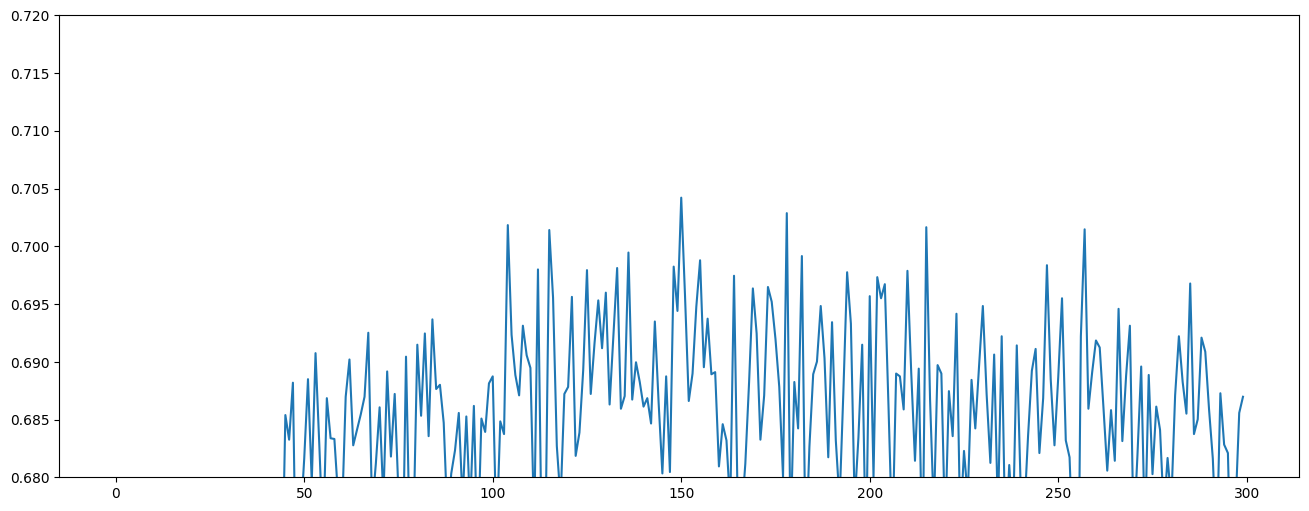

In [ ]:
plt.figure(figsize=(16.0, 6.0))
plt.plot(range(300), test_accuracy_history)

plt.ylim(0.68, 0.72)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
lenet = LeNet2().to(device)
optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
test_accuracy_history = []
batch_size = 1120

for epoch in bar(range(1000), desc='LEARNING'):
  order = np.random.permutation(len(train_data))

  for start_index in range(0, len(train_data), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index+batch_size]

    data_batch = train_data[batch_indexes]
    labels_batch= train_labels[batch_indexes]

    preds = lenet.forward(data_batch)

    loss_val = loss(preds, labels_batch)
    loss_val.backward()

    optimizer.step()

  test_preds = lenet.forward(test_data)

  accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)

<ipython-input-9-c3e8af0974e8>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in bar(range(1000), desc='LEARNING'):


LEARNING:   0%|          | 0/1000 [00:00<?, ?it/s]

(0.67, 0.735)

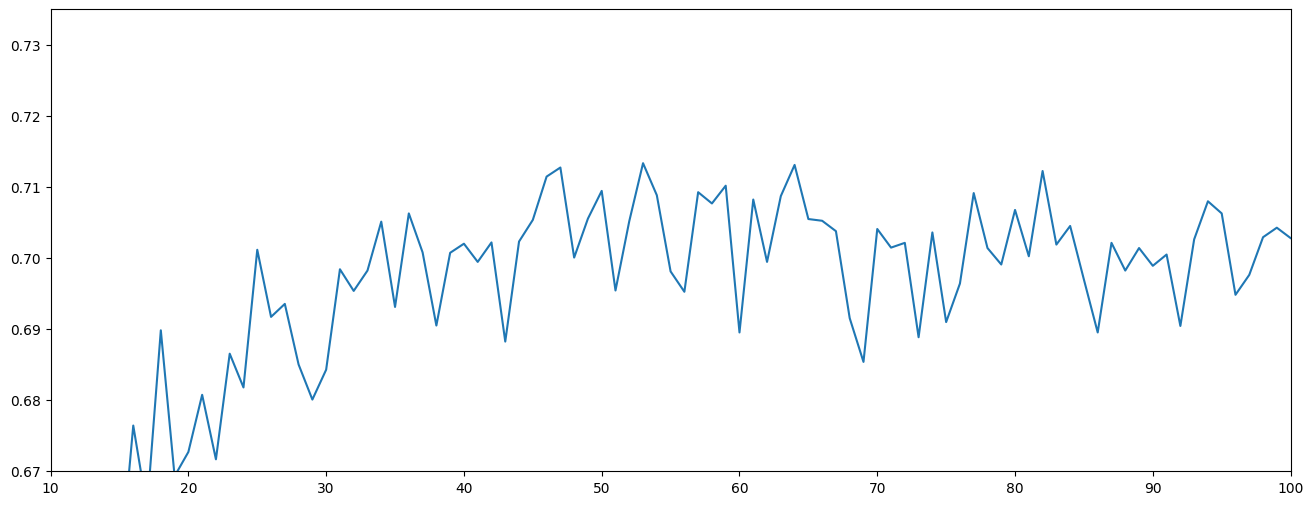

In [ ]:
plt.figure(figsize=(16.0, 6.0))
plt.plot(range(1000), test_accuracy_history)
plt.xlim(10, 100)
plt.ylim(0.67, 0.735)

In [ ]:
models = [LeNet1, LeNet2]

for model in bar(range(2), desc = 'MODELS'):
  accuracy_net = []
  for experiment in bar(range(20), desc = 'EXPERIMENT'):

    loss = torch.nn.CrossEntropyLoss()
    lenet = models[model]().to(device)
    optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
    batch_size = 1120

    for epoch in range(80):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()

    test_preds = lenet.forward(test_data)
    accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
    accuracy_net.append(accuracy)
    print(accuracy)
print(f'ACCURACY OF {model+1} MODEL:\n', *accuracy_net)

<ipython-input-29-ac10941723d0>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for model in bar(range(2), desc = 'MODELS'):


MODELS:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-29-ac10941723d0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'EXPERIMENT'):


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6545)
tensor(0.0499)
tensor(0.6129)
tensor(0.6855)
tensor(0.6873)
tensor(0.6990)
tensor(0.6871)
tensor(0.6844)
tensor(0.6951)
tensor(0.6817)
tensor(0.5866)
tensor(0.6839)
tensor(0.0499)
tensor(0.0499)
tensor(0.6889)
tensor(0.7124)
tensor(0.6756)
tensor(0.6992)
tensor(0.0499)
tensor(0.6933)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.7050)
tensor(0.6939)
tensor(0.7051)
tensor(0.6949)
tensor(0.7057)
tensor(0.6801)
tensor(0.6947)
tensor(0.7115)
tensor(0.7019)
tensor(0.0499)
tensor(0.6855)
tensor(0.7147)
tensor(0.7091)
tensor(0.7046)
tensor(0.7017)
tensor(0.7188)
tensor(0.6850)
tensor(0.6963)
tensor(0.6590)
tensor(0.6915)
ACCURACY OF 2 MODEL:
 tensor(0.7050) tensor(0.6939) tensor(0.7051) tensor(0.6949) tensor(0.7057) tensor(0.6801) tensor(0.6947) tensor(0.7115) tensor(0.7019) tensor(0.0499) tensor(0.6855) tensor(0.7147) tensor(0.7091) tensor(0.7046) tensor(0.7017) tensor(0.7188) tensor(0.6850) tensor(0.6963) tensor(0.6590) tensor(0.6915)


In [ ]:
acc1 = "tensor(0.6545) tensor(0.6129) tensor(0.6855) tensor(0.6873) tensor(0.6990) tensor(0.6871) tensor(0.6844) tensor(0.6951) tensor(0.6817) tensor(0.5866) tensor(0.6839) tensor(0.6889) tensor(0.7124) tensor(0.6756) tensor(0.6992) tensor(0.6933)"
acc2 = "tensor(0.7050) tensor(0.6939) tensor(0.7051) tensor(0.6949) tensor(0.7057) tensor(0.6801) tensor(0.6947) tensor(0.7115) tensor(0.7019) tensor(0.6855) tensor(0.7147) tensor(0.7091) tensor(0.7046) tensor(0.7017) tensor(0.7188) tensor(0.6850) tensor(0.6963) tensor(0.6590) tensor(0.6915)"
samples = [acc1,acc2]
for i in range(2):
    samples[i] = list(map(float, samples[i].replace("tensor(", '').replace(')', '').replace("[","").replace("]", "").split()))
print(samples[0])
print(samples[1])

[0.6545, 0.6129, 0.6855, 0.6873, 0.699, 0.6871, 0.6844, 0.6951, 0.6817, 0.5866, 0.6839, 0.6889, 0.7124, 0.6756, 0.6992, 0.6933]
[0.705, 0.6939, 0.7051, 0.6949, 0.7057, 0.6801, 0.6947, 0.7115, 0.7019, 0.6855, 0.7147, 0.7091, 0.7046, 0.7017, 0.7188, 0.685, 0.6963, 0.659, 0.6915]


{'whiskers': [<matplotlib.lines.Line2D at 0x7c0030f95f30>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0030f96470>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0030f95c90>,
 'medians': [<matplotlib.lines.Line2D at 0x7c0030f969b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c0030f96c50>,
 'means': []}

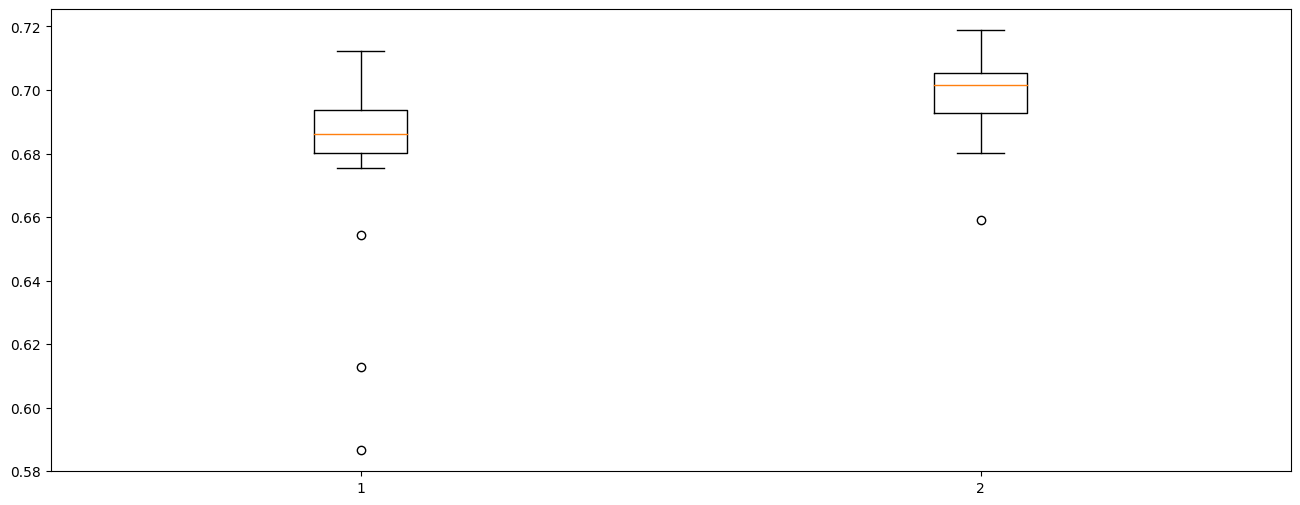

In [ ]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples)

In [ ]:
import scipy.stats as stats

In [ ]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.01553892592180715

## second investigation

In [6]:
class LeNet2(torch.nn.Module):
  def __init__(self, act_func):
    super(LeNet2, self).__init__()
    self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, padding=1)
    self.act1 = act_func()
    self.conv2 = torch.nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, padding=1)
    self.act2 = act_func()
    self.conv3 = torch.nn.Conv2d(in_channels=2, out_channels=4, kernel_size=3, padding=1)
    self.act3 = act_func()
    self.conv4 = torch.nn.Conv2d(in_channels=4, out_channels=4, kernel_size=3, padding=1)
    self.act4 = act_func()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    self.act5 = act_func()
    self.conv5 = torch.nn.Conv2d(in_channels=4, out_channels=8, kernel_size=3, padding=0)
    self.act6 = act_func()
    self.conv6 = torch.nn.Conv2d(in_channels=8, out_channels=8, kernel_size=3, padding=1)
    self.act7 = act_func()
    self.conv7 = torch.nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding=0)
    self.act8 = act_func()
    self.conv8 = torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, padding=1)
    self.act9 = act_func()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
    self.act10 = act_func()
    self.fc1 = torch.nn.Linear(16*5*5, 120)
    self.act11 = act_func()
    self.fc2 = torch.nn.Linear(120, 84)
    self.act12 = act_func()
    self.fc3 = torch.nn.Linear(84, 35)






  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    skip_conn1 = x

    x = self.conv2(x)
    x = self.act2(x)
    x = torch.add(x, skip_conn1)

    x = self.conv3(x)
    x = self.act3(x)
    skip_conn2 = x

    x = self.conv4(x)
    x = self.act4(x)
    x = torch.add(x, skip_conn2)

    x = self.pool1(x)
    x = self.act5(x)

    x = self.conv5(x)
    x = self.act6(x)
    skip_conn3 = x

    x = self.conv6(x)
    x = self.act7(x)
    x = torch.add(x, skip_conn3)

    x = self.conv7(x)
    x = self.act8(x)
    skip_conn4 = x

    x = self.conv8(x)
    x = self.act9(x)
    x = torch.add(x, skip_conn4)

    x = self.pool2(x)
    x = self.act10(x)
    x = x.view(x.size(0), x.size(1)*x.size(2)*x.size(3))
    x = self.fc1(x)
    x = self.act11(x)
    x = self.fc2(x)
    x = self.act12(x)
    x = self.fc3(x)
    return x

In [13]:
activation_functions = [torch.nn.ELU, torch.nn.LeakyReLU, torch.nn.PReLU, torch.nn.ReLU, torch.nn.ReLU6, torch.nn.SELU, torch.nn.CELU, torch.nn.GELU, torch.nn.Tanh]

In [ ]:
for af in bar(range(0, 6), desc = 'ACT FUNCTIONS'):
  accuracy_act_func = []
  for experiment in bar(range(20), desc = 'EXPERIMENT'):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet2(act_func=activation_functions[af]).to(device)
    optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
    batch_size = 1120

    for epoch in range(80):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      torch.cuda.empty_cache()

    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      accuracy_act_func.append(accuracy)
      print(accuracy)
  print(f'accuracy of {af} net:')
  print(*accuracy_act_func)

<ipython-input-47-348037c1e716>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for af in bar(range(0, 6), desc = 'ACT FUNCTIONS'):


ACT FUNCTIONS:   0%|          | 0/6 [00:00<?, ?it/s]

<ipython-input-47-348037c1e716>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'EXPERIMENT'):


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6834)
tensor(0.6884)
tensor(0.6730)
tensor(0.6849)
tensor(0.6999)
tensor(0.6942)
tensor(0.6777)
tensor(0.6809)
tensor(0.6657)
tensor(0.7127)
tensor(0.6860)
tensor(0.7076)
tensor(0.7179)
tensor(0.7005)
tensor(0.6850)
tensor(0.6825)
tensor(0.6817)
tensor(0.7031)
tensor(0.6965)
tensor(0.6943)
accuracy of 0 net:
tensor(0.6834) tensor(0.6884) tensor(0.6730) tensor(0.6849) tensor(0.6999) tensor(0.6942) tensor(0.6777) tensor(0.6809) tensor(0.6657) tensor(0.7127) tensor(0.6860) tensor(0.7076) tensor(0.7179) tensor(0.7005) tensor(0.6850) tensor(0.6825) tensor(0.6817) tensor(0.7031) tensor(0.6965) tensor(0.6943)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6949)
tensor(0.6650)
tensor(0.6532)
tensor(0.6927)
tensor(0.6699)
tensor(0.7112)
tensor(0.6784)
tensor(0.6667)
tensor(0.7060)
tensor(0.7137)
tensor(0.7151)
tensor(0.6856)
tensor(0.7191)
tensor(0.6714)
tensor(0.6826)
tensor(0.7052)
tensor(0.7063)
tensor(0.6803)
tensor(0.6790)
tensor(0.6802)
accuracy of 1 net:
tensor(0.6949) tensor(0.6650) tensor(0.6532) tensor(0.6927) tensor(0.6699) tensor(0.7112) tensor(0.6784) tensor(0.6667) tensor(0.7060) tensor(0.7137) tensor(0.7151) tensor(0.6856) tensor(0.7191) tensor(0.6714) tensor(0.6826) tensor(0.7052) tensor(0.7063) tensor(0.6803) tensor(0.6790) tensor(0.6802)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6677)
tensor(0.6858)
tensor(0.6948)
tensor(0.6873)
tensor(0.6764)
tensor(0.6982)
tensor(0.6635)
tensor(0.6817)
tensor(0.6638)
tensor(0.6802)
tensor(0.6519)
tensor(0.6875)
tensor(0.6789)
tensor(0.6689)
tensor(0.6978)
tensor(0.6496)
tensor(0.6831)
tensor(0.6925)
tensor(0.6760)
tensor(0.6816)
accuracy of 2 net:
tensor(0.6677) tensor(0.6858) tensor(0.6948) tensor(0.6873) tensor(0.6764) tensor(0.6982) tensor(0.6635) tensor(0.6817) tensor(0.6638) tensor(0.6802) tensor(0.6519) tensor(0.6875) tensor(0.6789) tensor(0.6689) tensor(0.6978) tensor(0.6496) tensor(0.6831) tensor(0.6925) tensor(0.6760) tensor(0.6816)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6973)
tensor(0.7032)
tensor(0.7044)
tensor(0.7232)
tensor(0.6401)
tensor(0.6904)
tensor(0.7141)
tensor(0.6854)
tensor(0.6701)
tensor(0.6524)
tensor(0.7010)
tensor(0.6541)
tensor(0.6788)
tensor(0.6696)
tensor(0.7135)
tensor(0.6875)
tensor(0.6819)
tensor(0.7080)
tensor(0.7028)
tensor(0.0499)
accuracy of 3 net:
tensor(0.6973) tensor(0.7032) tensor(0.7044) tensor(0.7232) tensor(0.6401) tensor(0.6904) tensor(0.7141) tensor(0.6854) tensor(0.6701) tensor(0.6524) tensor(0.7010) tensor(0.6541) tensor(0.6788) tensor(0.6696) tensor(0.7135) tensor(0.6875) tensor(0.6819) tensor(0.7080) tensor(0.7028) tensor(0.0499)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6971)
tensor(0.6985)
tensor(0.6902)
tensor(0.6763)
tensor(0.7015)
tensor(0.6965)
tensor(0.7065)
tensor(0.7019)
tensor(0.7208)
tensor(0.7020)
tensor(0.6999)
tensor(0.7190)
tensor(0.6889)
tensor(0.7225)
tensor(0.6988)
tensor(0.7112)
tensor(0.6965)
tensor(0.7088)
tensor(0.7017)


In [8]:
for af in bar(range(4, 6), desc = 'ACT FUNCTIONS'):
  accuracy_act_func = []
  for experiment in bar(range(20), desc = 'EXPERIMENT'):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet2(act_func=activation_functions[af]).to(device)
    optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
    batch_size = 1120

    for epoch in range(80):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      torch.cuda.empty_cache()

    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      accuracy_act_func.append(accuracy)
      print(accuracy)
  print(f'accuracy of {af} net:')
  print(*accuracy_act_func)

<ipython-input-8-a61420181af9>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for af in bar(range(4, 6), desc = 'ACT FUNCTIONS'):


ACT FUNCTIONS:   0%|          | 0/2 [00:00<?, ?it/s]

<ipython-input-8-a61420181af9>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'EXPERIMENT'):


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6695)
tensor(0.6870)
tensor(0.6981)
tensor(0.6604)
tensor(0.7113)
tensor(0.7101)
tensor(0.7080)
tensor(0.7152)
tensor(0.6991)
tensor(0.7261)
tensor(0.7064)
tensor(0.6336)
tensor(0.7138)
tensor(0.6932)
tensor(0.7170)
tensor(0.7201)
tensor(0.7187)
tensor(0.6846)
tensor(0.7076)
tensor(0.7155)
accuracy of 4 net:
tensor(0.6695) tensor(0.6870) tensor(0.6981) tensor(0.6604) tensor(0.7113) tensor(0.7101) tensor(0.7080) tensor(0.7152) tensor(0.6991) tensor(0.7261) tensor(0.7064) tensor(0.6336) tensor(0.7138) tensor(0.6932) tensor(0.7170) tensor(0.7201) tensor(0.7187) tensor(0.6846) tensor(0.7076) tensor(0.7155)


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6708)
tensor(0.6643)
tensor(0.7043)
tensor(0.6742)
tensor(0.6915)
tensor(0.6677)
tensor(0.6794)
tensor(0.6925)
tensor(0.6817)
tensor(0.6884)
tensor(0.7027)
tensor(0.6644)
tensor(0.6926)
tensor(0.7042)
tensor(0.7007)
tensor(0.7227)
tensor(0.6967)
tensor(0.6671)
tensor(0.6915)
tensor(0.7024)
accuracy of 5 net:
tensor(0.6708) tensor(0.6643) tensor(0.7043) tensor(0.6742) tensor(0.6915) tensor(0.6677) tensor(0.6794) tensor(0.6925) tensor(0.6817) tensor(0.6884) tensor(0.7027) tensor(0.6644) tensor(0.6926) tensor(0.7042) tensor(0.7007) tensor(0.7227) tensor(0.6967) tensor(0.6671) tensor(0.6915) tensor(0.7024)


In [14]:
for af in bar(range(8, 9), desc = 'ACT FUNCTIONS'):
  accuracy_act_func = []
  for experiment in bar(range(20), desc = 'EXPERIMENT'):

    loss = torch.nn.CrossEntropyLoss()
    lenet = LeNet2(act_func=activation_functions[af]).to(device)
    optimizer = torch.optim.Adam(lenet.parameters(), lr=0.001)
    batch_size = 1120

    for epoch in range(80):
      order = np.random.permutation(len(train_data))

      for start_index in range(0, len(train_data), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        data_batch = train_data[batch_indexes]
        labels_batch= train_labels[batch_indexes]

        preds = lenet.forward(data_batch)

        loss_val = loss(preds, labels_batch)
        loss_val.backward()

        optimizer.step()
      torch.cuda.empty_cache()

    with torch.no_grad():
      test_preds = lenet.forward(test_data)
      accuracy = (test_preds.argmax(dim=1)==test_labels).float().mean().data.cpu()
      accuracy_act_func.append(accuracy)
      print(accuracy)
  print(f'accuracy of {af} net:')
  print(*accuracy_act_func)

<ipython-input-14-d109503f960a>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for af in bar(range(8, 9), desc = 'ACT FUNCTIONS'):


ACT FUNCTIONS:   0%|          | 0/1 [00:00<?, ?it/s]

<ipython-input-14-d109503f960a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for experiment in bar(range(20), desc = 'EXPERIMENT'):


EXPERIMENT:   0%|          | 0/20 [00:00<?, ?it/s]

tensor(0.6815)
tensor(0.6864)
tensor(0.6982)
tensor(0.6984)
tensor(0.6925)
tensor(0.6867)
tensor(0.6986)
tensor(0.7071)
tensor(0.6971)
tensor(0.6840)
tensor(0.7050)
tensor(0.6918)
tensor(0.6992)
tensor(0.6775)
tensor(0.6912)
tensor(0.7036)
tensor(0.6904)
tensor(0.7035)
tensor(0.6765)
tensor(0.6780)
accuracy of 8 net:
tensor(0.6815) tensor(0.6864) tensor(0.6982) tensor(0.6984) tensor(0.6925) tensor(0.6867) tensor(0.6986) tensor(0.7071) tensor(0.6971) tensor(0.6840) tensor(0.7050) tensor(0.6918) tensor(0.6992) tensor(0.6775) tensor(0.6912) tensor(0.7036) tensor(0.6904) tensor(0.7035) tensor(0.6765) tensor(0.6780)


In [15]:
acc0 = "tensor(0.6834) tensor(0.6884) tensor(0.6730) tensor(0.6849) tensor(0.6999) tensor(0.6942) tensor(0.6777) tensor(0.6809) tensor(0.6657) tensor(0.7127) tensor(0.6860) tensor(0.7076) tensor(0.7179) tensor(0.7005) tensor(0.6850) tensor(0.6825) tensor(0.6817) tensor(0.7031) tensor(0.6965) tensor(0.6943)"
acc1 = "tensor(0.6949) tensor(0.6650) tensor(0.6532) tensor(0.6927) tensor(0.6699) tensor(0.7112) tensor(0.6784) tensor(0.6667) tensor(0.7060) tensor(0.7137) tensor(0.7151) tensor(0.6856) tensor(0.7191) tensor(0.6714) tensor(0.6826) tensor(0.7052) tensor(0.7063) tensor(0.6803) tensor(0.6790) tensor(0.6802)"
acc2 = "tensor(0.6677) tensor(0.6858) tensor(0.6948) tensor(0.6873) tensor(0.6764) tensor(0.6982) tensor(0.6635) tensor(0.6817) tensor(0.6638) tensor(0.6802) tensor(0.6519) tensor(0.6875) tensor(0.6789) tensor(0.6689) tensor(0.6978) tensor(0.6496) tensor(0.6831) tensor(0.6925) tensor(0.6760) tensor(0.6816)"
acc3 = "tensor(0.6973) tensor(0.7032) tensor(0.7044) tensor(0.7232) tensor(0.6401) tensor(0.6904) tensor(0.7141) tensor(0.6854) tensor(0.6701) tensor(0.6524) tensor(0.7010) tensor(0.6541) tensor(0.6788) tensor(0.6696) tensor(0.7135) tensor(0.6875) tensor(0.6819) tensor(0.7080) tensor(0.7028)"
acc4 = "tensor(0.6695) tensor(0.6870) tensor(0.6981) tensor(0.6604) tensor(0.7113) tensor(0.7101) tensor(0.7080) tensor(0.7152) tensor(0.6991) tensor(0.7261) tensor(0.7064) tensor(0.6336) tensor(0.7138) tensor(0.6932) tensor(0.7170) tensor(0.7201) tensor(0.7187) tensor(0.6846) tensor(0.7076) tensor(0.7155)"
acc5 = "tensor(0.6708) tensor(0.6643) tensor(0.7043) tensor(0.6742) tensor(0.6915) tensor(0.6677) tensor(0.6794) tensor(0.6925) tensor(0.6817) tensor(0.6884) tensor(0.7027) tensor(0.6644) tensor(0.6926) tensor(0.7042) tensor(0.7007) tensor(0.7227) tensor(0.6967) tensor(0.6671) tensor(0.6915) tensor(0.7024)"
acc6 = "tensor(0.6699) tensor(0.6694) tensor(0.6822) tensor(0.6793) tensor(0.6773) tensor(0.6871) tensor(0.6942) tensor(0.6750) tensor(0.6870) tensor(0.7008) tensor(0.6770) tensor(0.6504) tensor(0.6868) tensor(0.6802) tensor(0.6887) tensor(0.6990) tensor(0.7017) tensor(0.6948) tensor(0.6739) tensor(0.6723)"
acc7 = "tensor(0.6897) tensor(0.7087) tensor(0.6699) tensor(0.6504) tensor(0.7165) tensor(0.6806) tensor(0.7037) tensor(0.6564) tensor(0.6928) tensor(0.6997) tensor(0.6746) tensor(0.6840) tensor(0.6663) tensor(0.6755) tensor(0.6605) tensor(0.6819) tensor(0.7116) tensor(0.6951) tensor(0.7109) tensor(0.6741)"
acc8 = "tensor(0.6815) tensor(0.6864) tensor(0.6982) tensor(0.6984) tensor(0.6925) tensor(0.6867) tensor(0.6986) tensor(0.7071) tensor(0.6971) tensor(0.6840) tensor(0.7050) tensor(0.6918) tensor(0.6992) tensor(0.6775) tensor(0.6912) tensor(0.7036) tensor(0.6904) tensor(0.7035) tensor(0.6765) tensor(0.6780)"
samples = [acc0,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]
for i in range(9):
    samples[i] = list(map(float, samples[i].replace("tensor(", '').replace(')', '').replace("[","").replace("]", "").split()))
print(samples[0])
print(samples[1])
print(samples[2])
print(samples[3])
print(samples[4])
print(samples[5])
print(samples[6])
print(samples[7])
print(samples[8])


[0.6834, 0.6884, 0.673, 0.6849, 0.6999, 0.6942, 0.6777, 0.6809, 0.6657, 0.7127, 0.686, 0.7076, 0.7179, 0.7005, 0.685, 0.6825, 0.6817, 0.7031, 0.6965, 0.6943]
[0.6949, 0.665, 0.6532, 0.6927, 0.6699, 0.7112, 0.6784, 0.6667, 0.706, 0.7137, 0.7151, 0.6856, 0.7191, 0.6714, 0.6826, 0.7052, 0.7063, 0.6803, 0.679, 0.6802]
[0.6677, 0.6858, 0.6948, 0.6873, 0.6764, 0.6982, 0.6635, 0.6817, 0.6638, 0.6802, 0.6519, 0.6875, 0.6789, 0.6689, 0.6978, 0.6496, 0.6831, 0.6925, 0.676, 0.6816]
[0.6973, 0.7032, 0.7044, 0.7232, 0.6401, 0.6904, 0.7141, 0.6854, 0.6701, 0.6524, 0.701, 0.6541, 0.6788, 0.6696, 0.7135, 0.6875, 0.6819, 0.708, 0.7028]
[0.6695, 0.687, 0.6981, 0.6604, 0.7113, 0.7101, 0.708, 0.7152, 0.6991, 0.7261, 0.7064, 0.6336, 0.7138, 0.6932, 0.717, 0.7201, 0.7187, 0.6846, 0.7076, 0.7155]
[0.6708, 0.6643, 0.7043, 0.6742, 0.6915, 0.6677, 0.6794, 0.6925, 0.6817, 0.6884, 0.7027, 0.6644, 0.6926, 0.7042, 0.7007, 0.7227, 0.6967, 0.6671, 0.6915, 0.7024]
[0.6699, 0.6694, 0.6822, 0.6793, 0.6773, 0.6871, 0.694

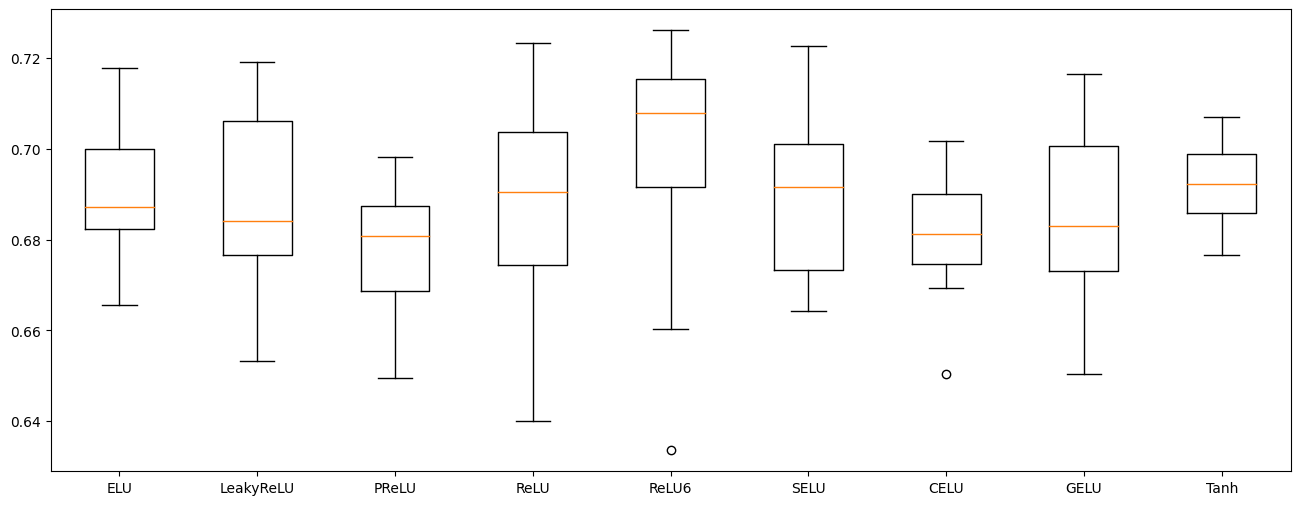

In [16]:
plt.figure(figsize = (16., 6.))
plt.boxplot(samples, labels = ["ELU", "LeakyReLU", "PReLU", "ReLU", "ReLU6", "SELU", "CELU", "GELU", "Tanh"])
plt.show()


In [18]:
import scipy.stats as stats

In [19]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[1])
p_val

0.7090858069439563

In [20]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[2])
p_val

0.006492565713133241

In [21]:
t_stat, p_val = stats.ttest_ind(samples[0], samples[3])
p_val

0.6790551650076241

In [22]:
t_stat, p_val = stats.ttest_ind(samples[3], samples[4])
p_val

0.12854549128628528

In [23]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[5])
p_val

0.07009107819962972

In [24]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[6])
p_val

0.005301450477386286

In [25]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[7])
p_val

0.036915679867372195

In [26]:
t_stat, p_val = stats.ttest_ind(samples[4], samples[8])
p_val

0.19341746741043936